In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from wrangle import get_beer, split_data, review_categorizer, wrangle_beer, find_lager



# Acquire

In [2]:
df = get_beer()

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# Prepare

In [ ]:
df.beer_style.nunique()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB


In [ ]:
df.describe()

In [ ]:
df.beer_abv.isnull().sum()

In [5]:
# filled missing abv values with mode abv. alcohol.org and other websites say 5% is average, mode is exactly 5%
# 67785 missing values in abv filled with mode

df['beer_abv'].fillna(df['beer_abv'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1586614 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB


In [6]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
df.info()

In [7]:
# dropped columns that contained nulls and were not likely useful

df = df.drop(columns=['review_profilename', 'brewery_name', 'brewery_id', 'review_time'], axis=1)

In [12]:
df.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_barley,is_lager
0,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,0
1,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1,0
2,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1,0
3,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1,1
4,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1,0


In [8]:
df.beer_style.unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [9]:
# using domain knowledge and BeerAdvocate descriptions, determined if a beer contained primarily barley or not

def find_barley(row):
    if row['beer_style'] == "Hefeweizen":
        val = 0
    elif row['beer_style']  == 'Oatmeal Stout':
        val = 0
    elif row['beer_style']  == 'American Adjunct Lager':
        val = 0
    elif row['beer_style']  == 'Fruit / Vegetable Beer':
        val = 0
    elif row['beer_style']  == 'Weizenbock':
        val = 0
    elif row['beer_style']  == 'Rye Beer':
        val = 0
    elif row['beer_style']  == 'American Pale Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Milk / Sweet Stout':
        val = 0
    elif row['beer_style']  == 'Witbier':
        val = 0
    elif row['beer_style']  == 'Dunkelweizen':
        val = 0
    elif row['beer_style']  == 'Roggenbier':
        val = 0
    elif row['beer_style']  == 'Japanese Rice Lager':
        val = 0
    elif row['beer_style']  == 'Wheatwine':
        val = 0
    elif row['beer_style']  == 'American Dark Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Kristalweizen':
        val = 0
    elif row['beer_style']  == 'Braggot':
        val = 0
    elif row['beer_style']  == 'Berliner Weissbier':
        val = 0
    elif row['beer_style']  == 'Kvass':
        val = 0
    elif row['beer_style']  == 'Happoshu':
        val = 0
    elif row['beer_style']  == 'Sahti':
        val = 0
    else:
        val = 1
    return val

df['is_barley'] = df.apply(find_barley, axis=1)
df.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_barley
0,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1
2,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1
3,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1
4,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1


In [10]:
# using domain knowledge and information from total wine, utilized beer type 
# column to determine if each beer type is an ale or lager

def find_lager(row):
    if row['beer_style'] == "Hefeweizen":
        val = 0
    elif row['beer_style']  == 'English Strong Ale':
        val = 0
    elif row['beer_style']  == 'Foreign / Export Stout':
        val = 0
    elif row['beer_style']  == 'American Double / Imperial IPA':
        val = 0
    elif row['beer_style']  == 'Herbed / Spiced Beer':
        val = 0
    elif row['beer_style']  == 'Oatmeal Stout':
        val = 0
    elif row['beer_style']  == 'American Pale Ale (APA)':
        val = 0
    elif row['beer_style']  == 'American Porter':
        val = 0
    elif row['beer_style']  == 'Belgian Strong Dark Ale':
        val = 0
    elif row['beer_style']  == 'American IPA':
        val = 0
    elif row['beer_style']  == 'American Stout':
        val = 0
    elif row['beer_style']  == 'Russian Imperial Stout':
        val = 0
    elif row['beer_style']  == 'American Amber / Red Ale':
        val = 0
    elif row['beer_style']  == 'American Strong Ale':
        val = 0
    elif row['beer_style']  == 'American Blonde Ale':
        val = 0
    elif row['beer_style']  == 'English Brown Ale':
        val = 0
    elif row['beer_style']  == 'Scotch Ale / Wee Heavy':
        val = 0
    elif row['beer_style']  == 'Fruit / Vegetable Beer':
        val = 0
    elif row['beer_style']  == 'American Double / Imperial Stout':
        val = 0
    elif row['beer_style']  == 'Belgian Pale Ale':
        val = 0
    elif row['beer_style']  == 'English Bitter':
        val = 0
    elif row['beer_style']  == 'English Porter':
        val = 0
    elif row['beer_style']  == 'American Barleywine':
        val = 0
    elif row['beer_style']  == 'Belgian Strong Pale Ale':
        val = 0
    elif row['beer_style']  == 'Pumpkin Ale':
        val = 0
    elif row['beer_style']  == 'Extra Special / Strong Bitter (ESB)':
        val = 0
    elif row['beer_style']  == 'English India Pale Ale (IPA)':
        val = 0
    elif row['beer_style']  == 'Kölsch':
        val = 0
    elif row['beer_style']  == 'Rye Beer':
        val = 0
    elif row['beer_style']  == 'American Pale Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Milk / Sweet Stout':
        val = 0
    elif row['beer_style']  == 'Scottish Ale':
        val = 0
    elif row['beer_style']  == 'Witbier':
        val = 0
    elif row['beer_style']  == 'American Black Ale':
        val = 0
    elif row['beer_style']  == 'Saison / Farmhouse Ale':
        val = 0
    elif row['beer_style']  == 'Irish Dry Stout':
        val = 0
    elif row['beer_style']  == 'English Barleywine':
        val = 0
    elif row['beer_style']  == 'English Dark Mild Ale':
        val = 0
    elif row['beer_style']  == 'English Pale Ale':
        val = 0
    elif row['beer_style']  == 'Belgian IPA':
        val = 0
    elif row['beer_style']  == 'Tripel':
        val = 0
    elif row['beer_style']  == 'Flanders Oud Bruin':
        val = 0
    elif row['beer_style']  == 'American Brown Ale':
        val = 0
    elif row['beer_style']  == 'Winter Warmer':
        val = 0
    elif row['beer_style']  == 'Smoked Beer':
        val = 0
    elif row['beer_style']  == 'Dubbel':
        val = 0
    elif row['beer_style']  == 'Flanders Red Ale':
        val = 0
    elif row['beer_style']  == 'Dunkelweizen':
        val = 0
    elif row['beer_style']  == 'Belgian Dark Ale':
        val = 0
    elif row['beer_style']  == 'Bière de Garde':
        val = 0
    elif row['beer_style']  == 'Irish Red Ale':
        val = 0
    elif row['beer_style']  == 'English Stout':
        val = 0
    elif row['beer_style']  == 'Cream Ale':
        val = 0
    elif row['beer_style']  == 'American Wild Ale':
        val = 0
    elif row['beer_style']  == 'Scottish Gruit / Ancient Herbed Ale':
        val = 0
    elif row['beer_style']  == 'Wheatwine':
        val = 0
    elif row['beer_style']  == 'American Dark Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Baltic Porter':
        val = 0
    elif row['beer_style']  == 'Kristalweizen':
        val = 0
    elif row['beer_style']  == 'English Pale Mild Ale':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Quadrupel (Quad)':
        val = 0
    elif row['beer_style']  == 'Braggot':
        val = 0
    elif row['beer_style']  == 'Lambic - Unblended':
        val = 0
    elif row['beer_style']  == 'Berliner Weissbier':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Kvass':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Faro':
        val = 0
    elif row['beer_style']  == 'Gueuze':
        val = 0
    elif row['beer_style']  == 'Gose':
        val = 0
    elif row['beer_style']  == 'Sahti':
        val = 0
    elif row['beer_style']  == 'Bière de Champagne / Bière Brut':
        val = 0
    else:
        val = 1
    return val

df['is_lager'] = df.apply(find_lager, axis=1)
df.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_barley,is_lager
0,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,0
1,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1,0
2,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1,0
3,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1,1
4,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_overall     1586614 non-null  float64
 1   review_aroma       1586614 non-null  float64
 2   review_appearance  1586614 non-null  float64
 3   beer_style         1586614 non-null  object 
 4   review_palate      1586614 non-null  float64
 5   review_taste       1586614 non-null  float64
 6   beer_name          1586614 non-null  object 
 7   beer_abv           1586614 non-null  float64
 8   beer_beerid        1586614 non-null  int64  
 9   is_barley          1586614 non-null  int64  
 10  is_lager           1586614 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 145.3+ MB


In [ ]:
df.info()

In [ ]:
df[df.review_overall < 1].shape

In [ ]:
df.shape

In [13]:
def review_categorizer(row):
    if row['review_overall'] <= 1:
        val = 1
    elif row['review_overall']  <= 2:
        val = 2
    elif row['review_overall']  <= 3:
        val = 3
    elif row['review_overall']  <= 4:
        val = 4
    else:
        val = 5
    return val

df['review_cat'] = df.apply(review_categorizer, axis=1)

In [14]:
df.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_barley,is_lager,review_cat
0,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,0,2
1,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1,0,3
2,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1,0,3
3,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1,1,3
4,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1,0,4


In [15]:
def split_data(df, test_size=.2, validate_size=.25, col_to_stratify=None, random_state=7):
    '''
    This splits data into test,train and validate data
    '''
    # This takes in a default variable or a variable to determine target variable for stratification
    if col_to_stratify == None:
    # this splits the data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state)
        train, validate = train_test_split(train_validate,
                                       test_size=validate_size,
                                       random_state=random_state,)
    else:                                                        
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df[col_to_stratify])
        train, validate = train_test_split(train_validate,
                                       test_size=validate_size,
                                       random_state=random_state,
                                       stratify=train_validate[col_to_stratify])
    return train, validate, test


In [16]:
train, validate, test = split_data(df, col_to_stratify='review_cat')
train.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_barley,is_lager,review_cat
571456,4.5,4.0,3.5,Saison / Farmhouse Ale,4.0,4.0,Bam Noire,4.3,38459,1,0,5
662029,4.0,4.0,2.5,American IPA,3.0,3.0,Duet IPA,7.0,27604,1,0,4
668428,4.0,4.0,3.5,Kölsch,3.5,4.0,Reissdorf Kölsch,4.8,2040,1,0,4
413225,4.0,4.0,3.5,American Strong Ale,4.0,4.0,Great Lakes Nosferatu,8.0,1792,1,0,4
912613,3.0,3.0,3.5,English Brown Ale,3.5,3.5,Brown Ale,5.4,16879,1,0,3


In [17]:
train.shape

(951968, 12)

In [18]:
validate.shape

(317323, 12)

In [19]:
test.shape

(317323, 12)

# Explore

### Target and overall data

In [20]:
train.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,is_barley,is_lager,review_cat
count,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000
mean,3.815627,3.736057,3.841506,3.743416,3.793138,6.953427,21715.507504,0.860780,0.184470,4.035455
std,0.720539,0.697346,0.616153,0.682205,0.731730,2.307333,21821.529150,0.346176,0.387868,0.770258
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000,0.000000,0.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,5.100000,1717.000000,1.000000,0.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,6.300000,13906.000000,1.000000,0.000000,4.000000
75%,4.500000,4.000000,4.000000,4.000000,4.500000,8.400000,39441.000000,1.000000,0.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77317.000000,1.000000,1.000000,5.000000


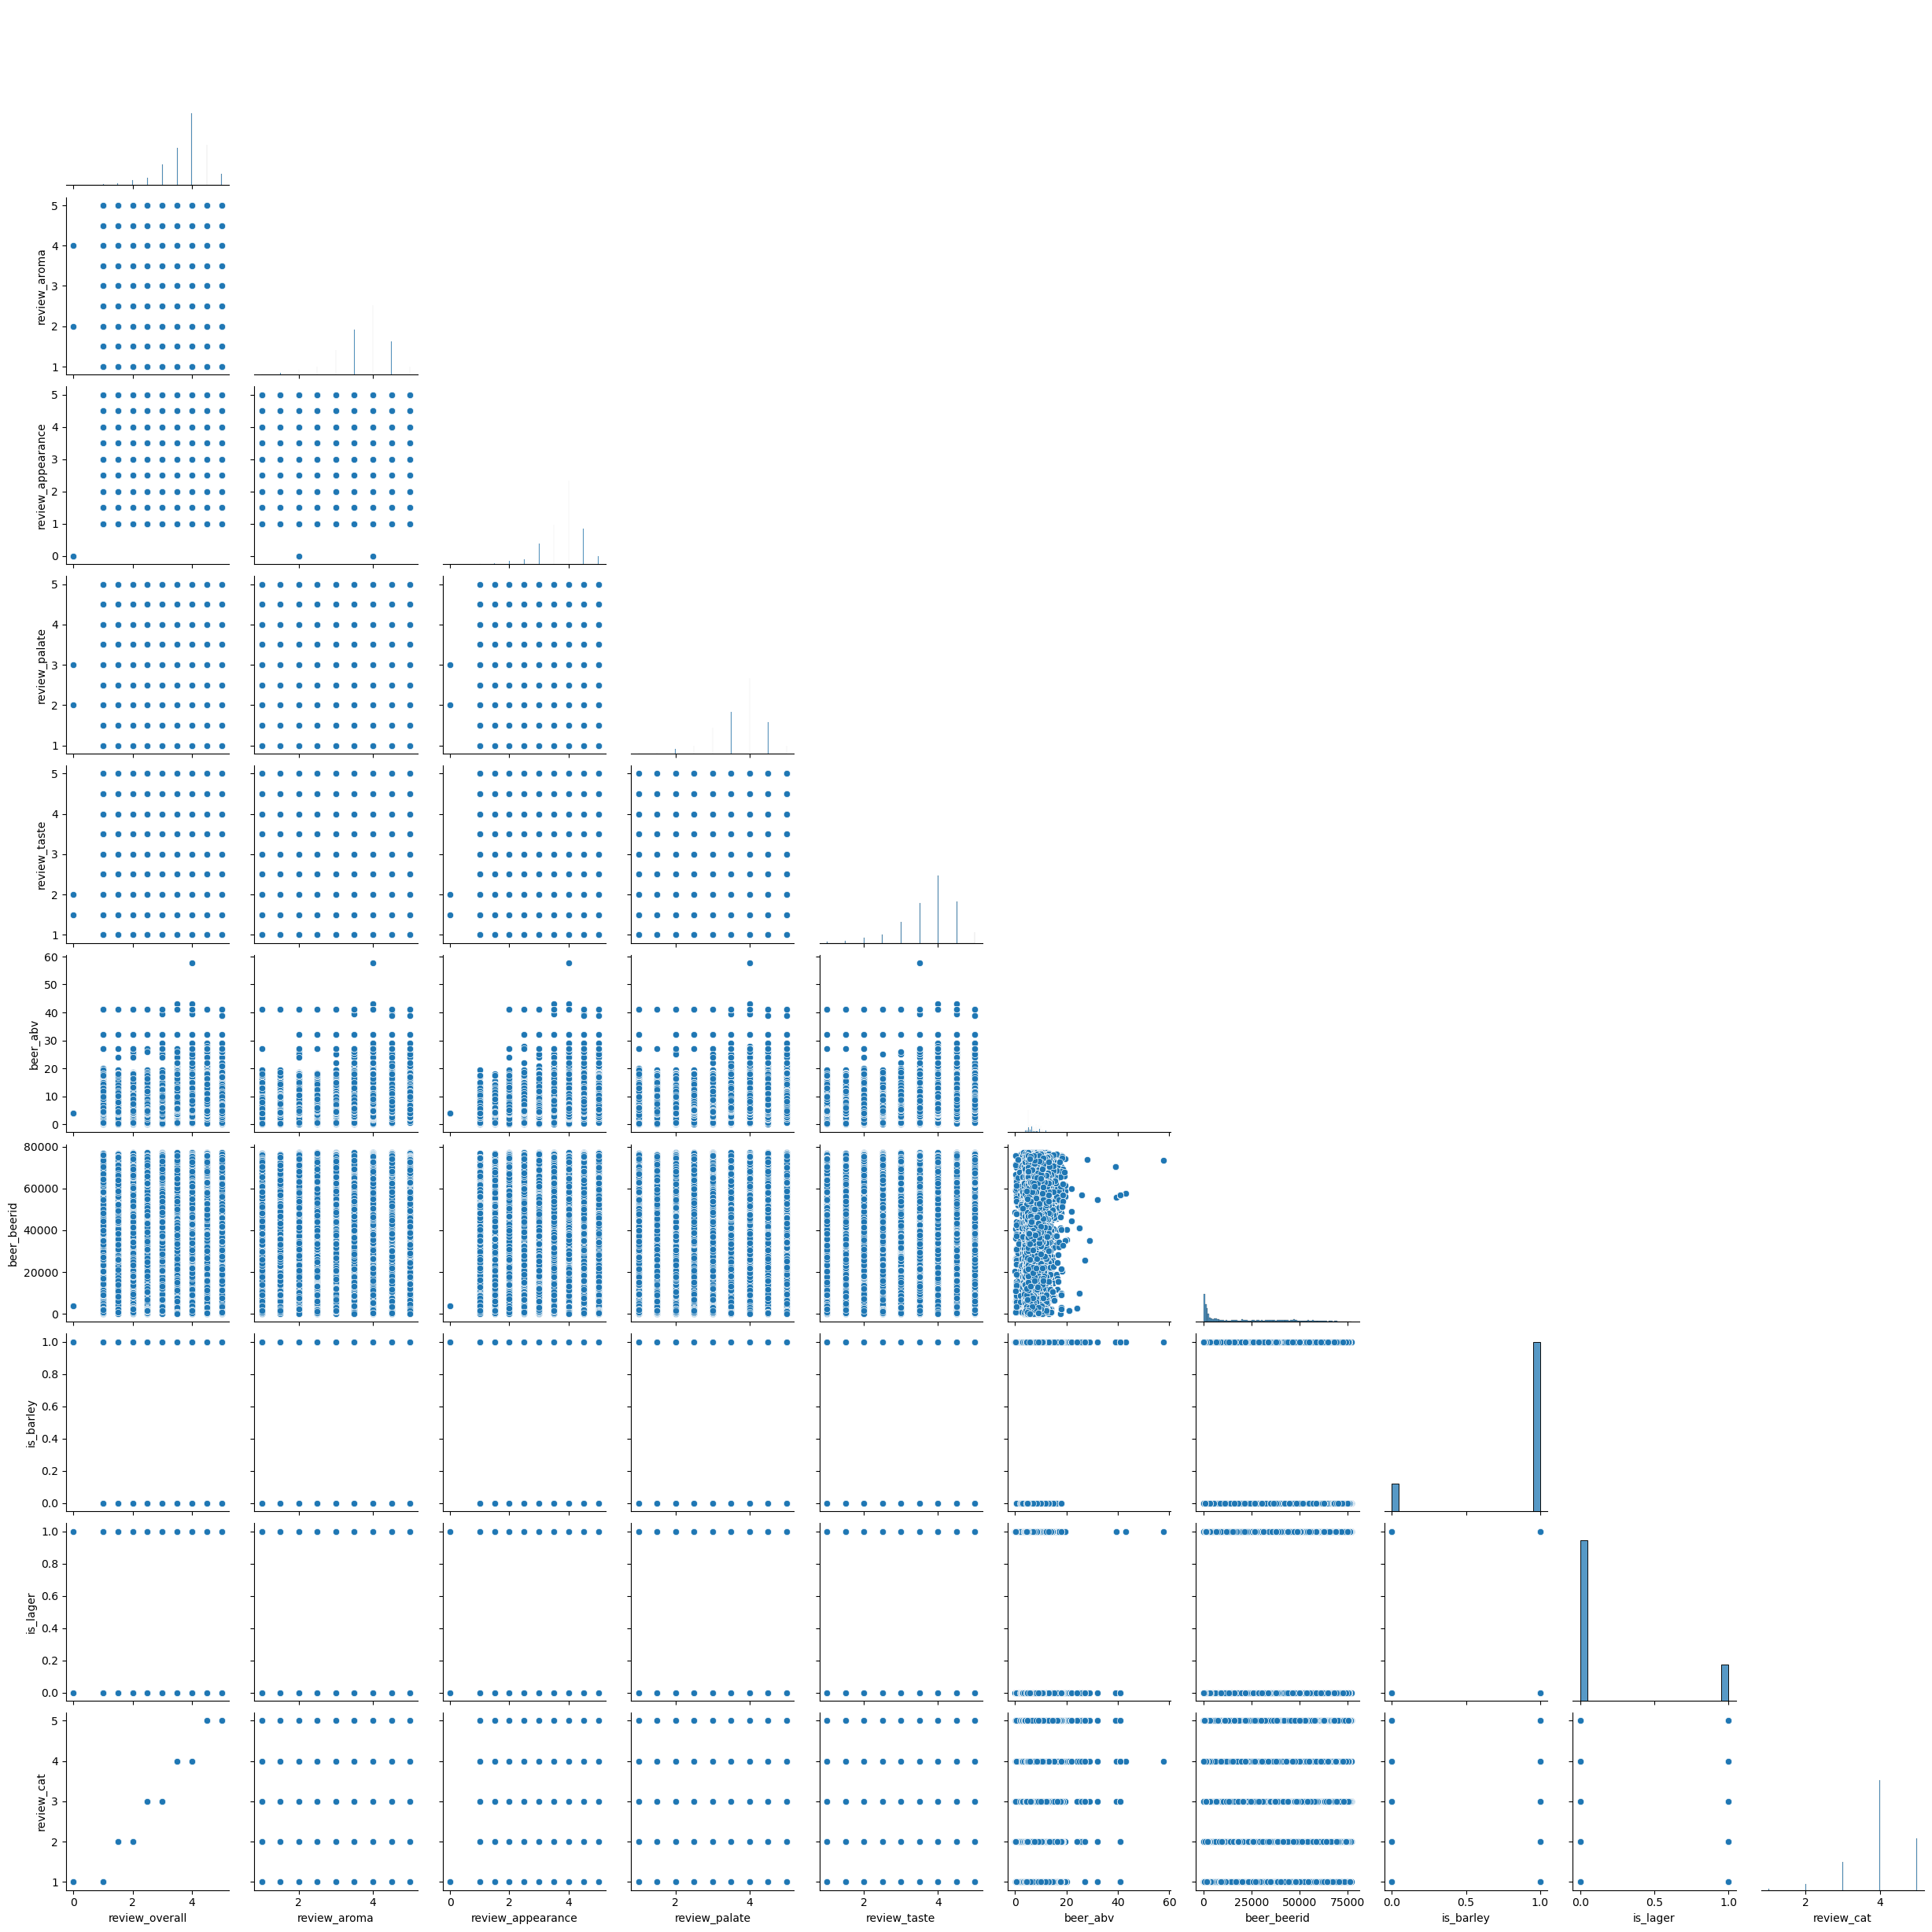

In [21]:
sns.pairplot(data=train, corner=True)

<Axes: >

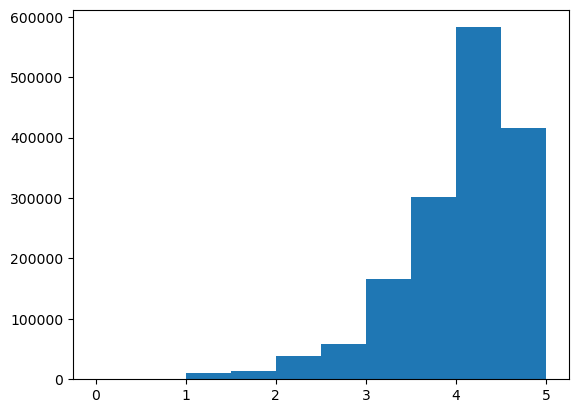

In [22]:
df.review_overall.hist(grid=False)

In [ ]:
# not normally distributed, values are skewed left

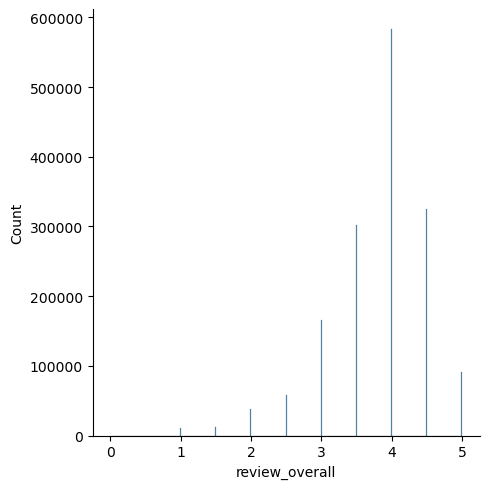

In [23]:
sns.displot(df.review_overall)

### Individual variables and correlations

<Axes: xlabel='is_lager', ylabel='count'>

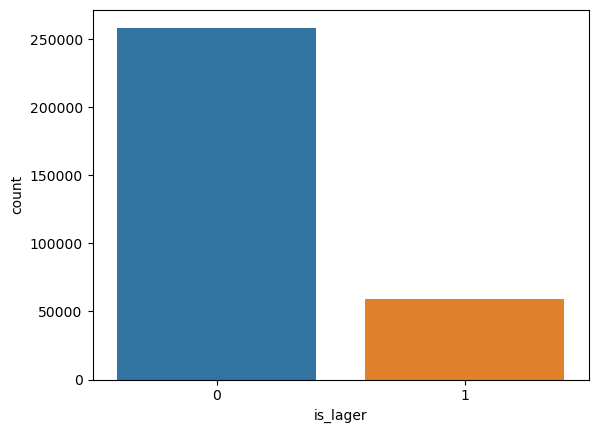

In [24]:
sns.countplot(data=train, x='is_lager')

<Axes: xlabel='is_barley', ylabel='count'>

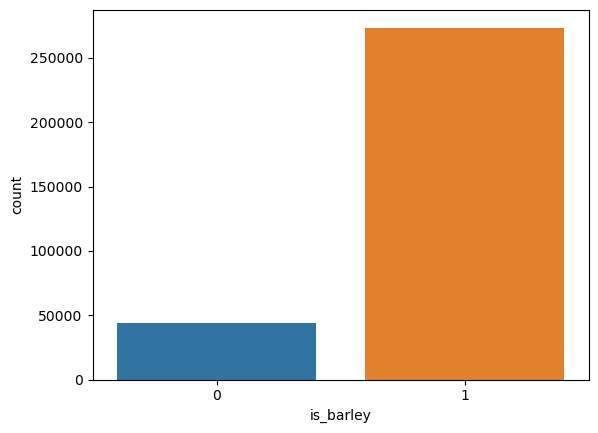

In [25]:
sns.countplot(data=train, x='is_barley')

##### A LOT more ales that lagers in the dataset
##### A LOT more barley beers (this makes sense)

In [26]:
train.corr()['review_overall']

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_24675/1378347002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['review_overall']


review_overall       1.000000
review_aroma         0.616727
review_appearance    0.501870
review_palate        0.701773
review_taste         0.790285
beer_abv             0.142879
beer_beerid          0.002598
is_barley            0.089555
is_lager            -0.161482
review_cat           0.946740
Name: review_overall, dtype: float64

In [27]:
train.corr()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_24675/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,is_barley,is_lager,review_cat
review_overall,1.000000,0.616727,0.501870,0.701773,0.790285,0.142879,0.002598,0.089555,-0.161482,0.946740
review_aroma,0.616727,1.000000,0.560647,0.617183,0.716998,0.331466,0.077246,0.130986,-0.286981,0.583325
review_appearance,0.501870,0.560647,1.000000,0.567248,0.547103,0.265134,0.053879,0.149138,-0.254568,0.474821
review_palate,0.701773,0.617183,0.567248,1.000000,0.733931,0.287598,0.044465,0.127212,-0.217467,0.662622
review_taste,0.790285,0.716998,0.547103,0.733931,1.000000,0.291259,0.029274,0.132305,-0.226647,0.745791
beer_abv,0.142879,0.331466,0.265134,0.287598,0.291259,1.000000,0.183186,0.224960,-0.217818,0.136423
beer_beerid,0.002598,0.077246,0.053879,0.044465,0.029274,0.183186,1.000000,0.037948,-0.115123,0.003839
is_barley,0.089555,0.130986,0.149138,0.127212,0.132305,0.224960,0.037948,1.000000,-0.007797,0.084680
is_lager,-0.161482,-0.286981,-0.254568,-0.217467,-0.226647,-0.217818,-0.115123,-0.007797,1.000000,-0.153822
review_cat,0.946740,0.583325,0.474821,0.662622,0.745791,0.136423,0.003839,0.084680,-0.153822,1.000000


* taste is sub category most closely correlated with overall quality
* least correlated is appearance
* lager vs ale category is more highly correlated with overall quality than ABV
* ABV is most highly correlated with aroma
* lager category is most (negatively) correlated with aroma as well

<Axes: xlabel='is_lager', ylabel='review_overall'>

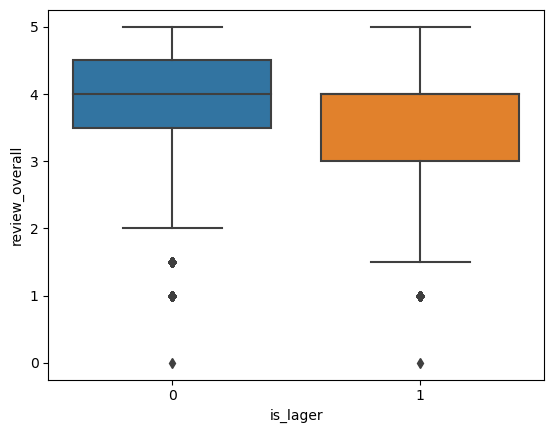

In [28]:
sns.boxplot(data=train, x='is_lager', y='review_overall')


<Axes: xlabel='is_barley', ylabel='review_overall'>

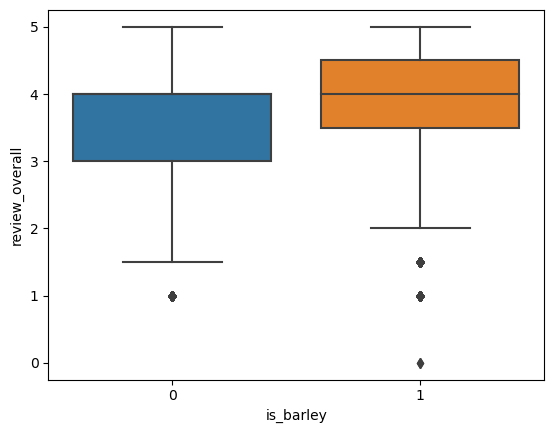

In [29]:
sns.boxplot(data=train, x='is_barley', y='review_overall')

* Ales seem to be rated overall higher in quality than lagers

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_24675/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

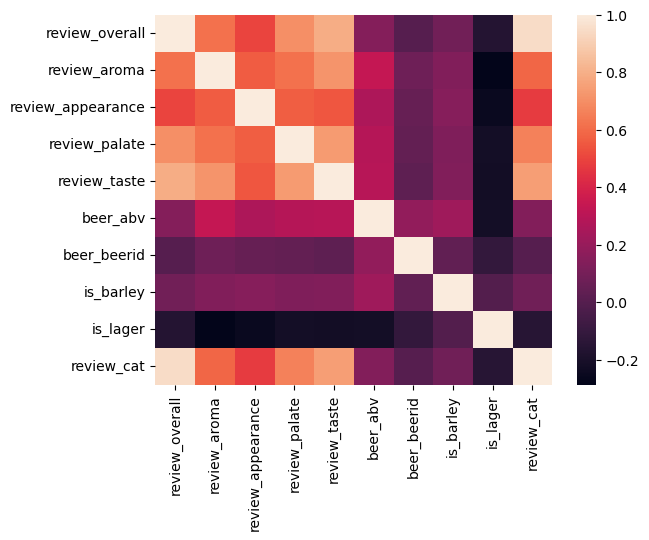

In [30]:
sns.heatmap(train.corr())

In [ ]:
### Multiple Variables

(1.0, 10.0)

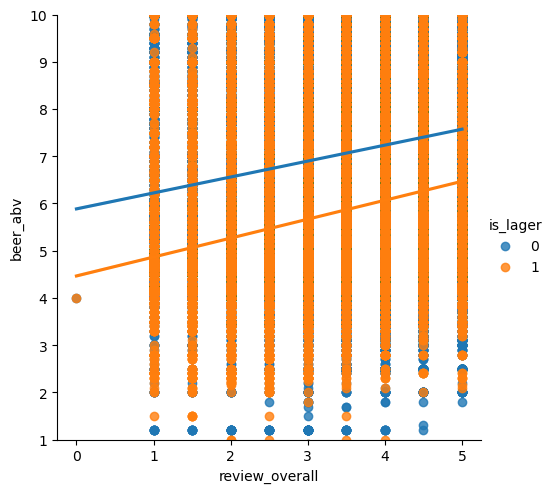

In [35]:
sns.lmplot(x='review_overall', y='beer_abv', data=train, scatter=True, hue='is_lager')
plt.ylim(1,10)

(1.0, 10.0)

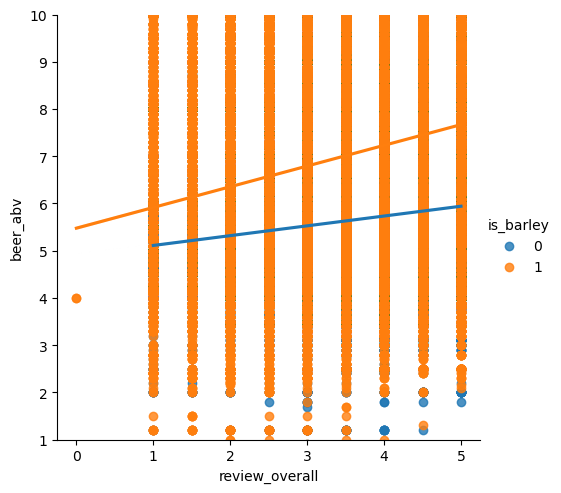

In [36]:
sns.lmplot(x='review_overall', y='beer_abv', data=train, scatter=True, hue='is_barley')
plt.ylim(1,10)

<function matplotlib.pyplot.show(close=None, block=None)>

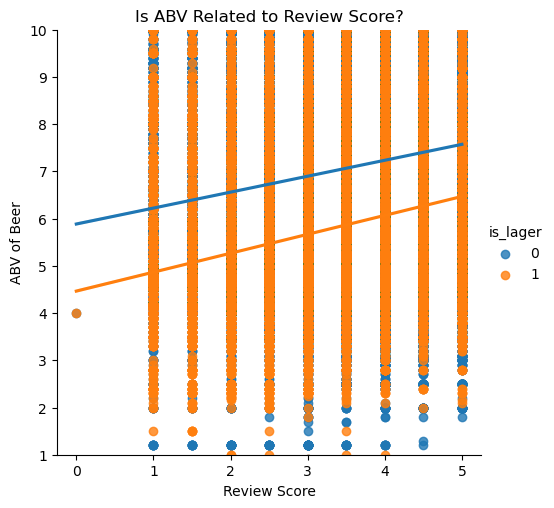

In [37]:
sns.lmplot(x='review_overall', y='beer_abv', data=train, scatter=True, hue='is_lager')
plt.ylabel('ABV of Beer')
plt.xlabel('Review Score')
plt.title('Is ABV Related to Review Score?')
plt.ylim(1,10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

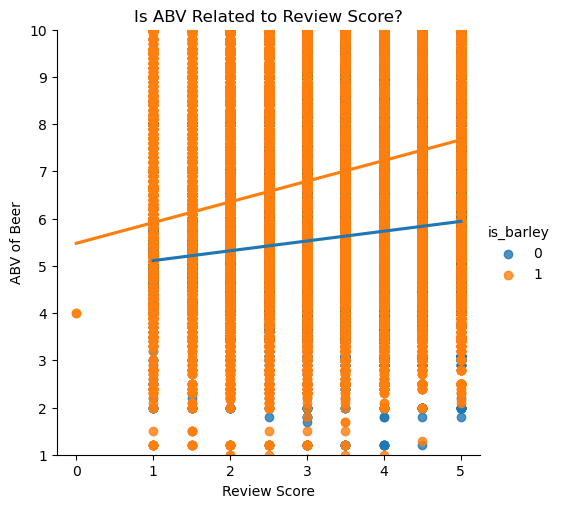

In [38]:
sns.lmplot(x='review_overall', y='beer_abv', data=train, scatter=True, hue='is_barley')
plt.ylabel('ABV of Beer')
plt.xlabel('Review Score')
plt.title('Is ABV Related to Review Score?')
plt.ylim(1,10)
plt.show

* increase in ABV is associated with increase in quality, especially with lagers and traditional (barley) beers

<Axes: xlabel='is_lager', ylabel='review_cat'>

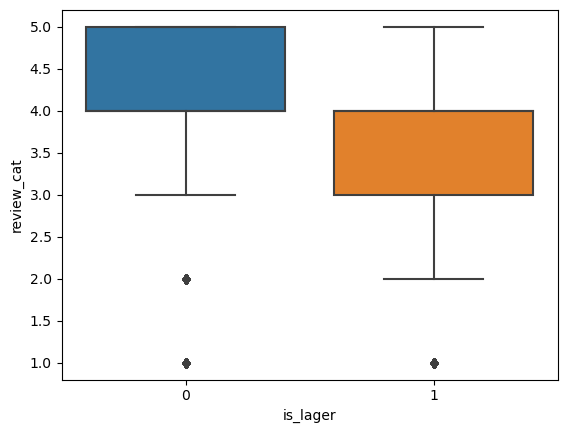

In [40]:
sns.boxplot(data=train, x='is_lager', y='review_cat')

<Axes: xlabel='is_barley', ylabel='review_cat'>

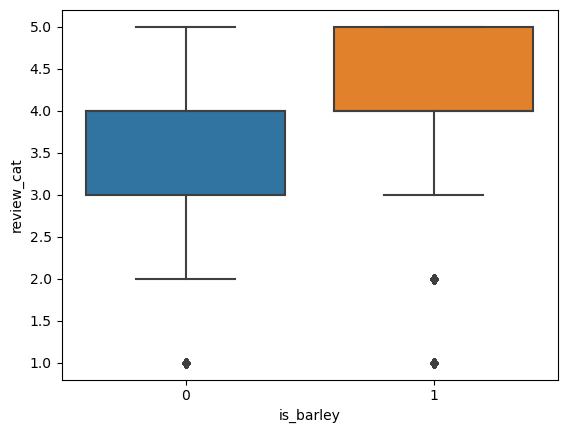

In [41]:
sns.boxplot(data=train, x='is_barley', y='review_cat')

(3.0, 4.25)

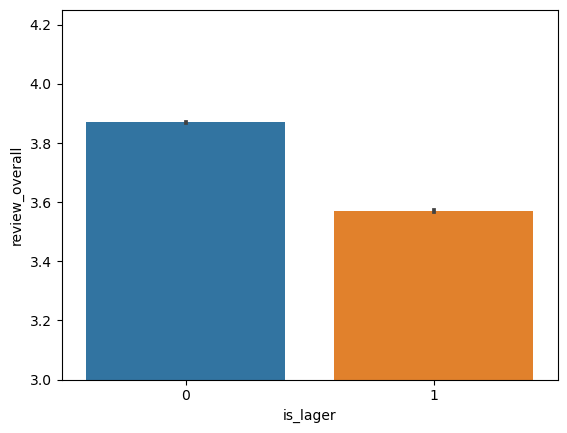

In [42]:
sns.barplot(data=train, x='is_lager', y='review_overall')
plt.ylim(3,4.25)

(3.0, 4.25)

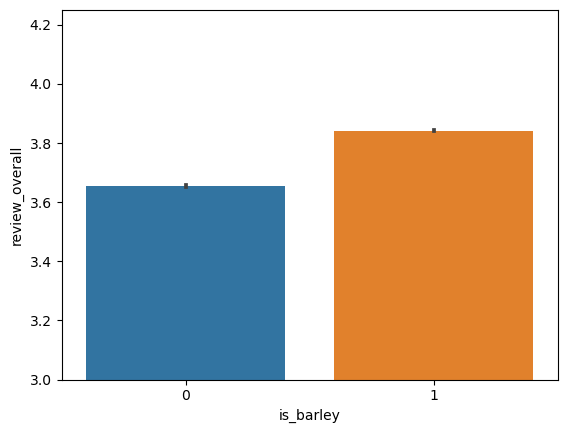

In [43]:
sns.barplot(data=train, x='is_barley', y='review_overall')
plt.ylim(3,4.25)

* roughly .3 difference in score between lagers and ales. Lagers win out.
* roughly .2 difference in score between barley and not barley beers. Barley wins out

### Stats testing

Target variable is heavily skewed, we cannot assume normality
Alpha is set to .05 for all statistical tests

In [44]:
# statistical significant relationship between overall review and lager vs ale? Yes

corr, p = stats.pearsonr(train.review_overall, train.is_lager)
corr, p


(-0.1614817901486876, 0.0)

In [45]:
# statistical significant relationship between overall review and abv? Yes

corr, p = stats.pearsonr(train.review_overall, train.beer_abv)
corr, p

(0.14287864024093855, 0.0)

statistically significant difference in mean overall score between ales and lagers?

Ho: No statistically significant difference between the mean scores of ales and lagers
Ha: There is a statistically significant difference between the mean scores of ales and lagers

In [46]:
# independent, one sided mann whitney test measuring statistical significance absent of normal distribution

stats.mannwhitneyu(train[train.is_lager==0].review_overall, 
             train[train.is_lager==1].review_overall, alternative='')


MannwhitneyuResult(statistic=82050173660.0, pvalue=0.0)

In [ ]:
# We reject the null hypothesis

statistically significant difference in mean overall score between barley and not barley beers?

Ho: No statistically significant difference between the mean scores of barley and not barley beers
Ha: There is a statistically significant difference between the mean scores of barley and not barley beers

In [47]:
# independent, one sided mann whitney test measuring statistical significance absent of normal distribution

stats.mannwhitneyu(train[train.is_barley==0].review_overall, 
             train[train.is_barley==1].review_overall, alternative='less')


MannwhitneyuResult(statistic=47525374106.5, pvalue=0.0)

In [ ]:
# We reject the null hypothesis

# Modeling

We will start with modeling on only our "objective" (non-review) variables

In [48]:
train.columns.values.tolist()

['review_overall',
 'review_aroma',
 'review_appearance',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'is_barley',
 'is_lager',
 'review_cat']

In [49]:
# splits into x and y for features and target variable on train, test, and validate
X_train = train.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_train = train.review_cat

X_validate = validate.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_validate = validate.review_cat

X_test = test.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_test = test.review_cat


In [50]:
y_train.sample(15)

211981     4
687272     2
857797     4
36070      3
1467385    4
333009     4
1506285    5
1300960    2
197912     4
685621     3
1162593    4
946160     5
128941     4
707859     3
1027465    4
Name: review_cat, dtype: int64

In [51]:
X_train.head()

,beer_abv,is_barley,is_lager
571456,4.3,1,0
662029,7.0,1,0
668428,4.8,1,0
413225,8.0,1,0
912613,5.4,1,0


## Random Forest

In [52]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 4

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.56


In [53]:
# Random Forest Function
for i in range(2, 11):
    # Makes Random Forest Model
    forest = RandomForestClassifier(max_depth=i, random_state=7)

    # Fit the model 
    forest = forest.fit(X_train, y_train)

    # Use model
    # Evaluate on train
    y_predictions = forest.predict(X_train)

    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 2
                1        2         3              4         5  accuracy  \
precision     0.0      0.0       0.0       0.557527       0.0  0.557527   
recall        0.0      0.0       0.0       1.000000       0.0  0.557527   
f1-score      0.0      0.0       0.0       0.715913       0.0  0.557527   
support    6577.0  30720.0  134500.0  530748.000000  249423.0  0.557527   

               macro avg   weighted avg  
precision       0.111505       0.310837  
recall          0.200000       0.557527  
f1-score        0.143183       0.399141  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 3
                1        2         3              4         5  accuracy  \
precision     0.0      0.0       0.0       0.557527       0.0  0.557527   
recall        0.0      0.0       0.0       1.000000       0.0  0.557527   
f1-score      0.0      0.0       0.0       0.715913       0.0  0.557527   
support    6577.0  30720.0  134500.0  530748.000000  249423.0  0.557527   

               macro avg   weighted avg  
precision       0.111505       0.310837  
recall          0.200000       0.557527  
f1-score        0.143183       0.399141  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 4
                1        2              3              4         5  accuracy  \
precision     0.0      0.0       0.365949       0.559632       0.0  0.558017   
recall        0.0      0.0       0.021606       0.995403       0.0  0.558017   
f1-score      0.0      0.0       0.040803       0.716459       0.0  0.558017   
support    6577.0  30720.0  134500.000000  530748.000000  249423.0  0.558017   

               macro avg   weighted avg  
precision       0.185116       0.363714  
recall          0.203402       0.558017  
f1-score        0.151452       0.405210  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 5
                1        2              3              4         5  accuracy  \
precision     0.0      0.0       0.365404       0.564873       0.0  0.559786   
recall        0.0      0.0       0.065963       0.987335       0.0  0.559786   
f1-score      0.0      0.0       0.111752       0.718614       0.0  0.559786   
support    6577.0  30720.0  134500.000000  530748.000000  249423.0  0.559786   

               macro avg   weighted avg  
precision       0.186055       0.366559  
recall          0.210660       0.559786  
f1-score        0.166073       0.416436  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 6
                1             2              3              4              5  \
precision     0.0      0.337782       0.369723       0.565163       0.462589   
recall        0.0      0.010710       0.064208       0.986150       0.002851   
f1-score      0.0      0.020761       0.109415       0.718534       0.005666   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.559969       0.347052       0.499433  
recall     0.559969       0.212784       0.559969  
f1-score   0.559969       0.170875       0.418216  
support    0.559969  951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 7
                1             2              3              4              5  \
precision     0.0      0.348579       0.371537       0.565098       0.487594   
recall        0.0      0.016374       0.061822       0.986370       0.003388   
f1-score      0.0      0.031278       0.106005       0.718540       0.006729   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.560079       0.354562       0.506553  
recall     0.560079       0.213591       0.560079  
f1-score   0.560079       0.172510       0.418355  
support    0.560079  951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 8
                1             2              3              4              5  \
precision     0.0      0.356787       0.372915       0.565556       0.524653   
recall        0.0      0.018652       0.061993       0.984714       0.008191   
f1-score      0.0      0.035451       0.106312       0.718469       0.016130   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.560511       0.363982       0.516977  
recall     0.560511       0.214710       0.560511  
f1-score   0.560511       0.175273       0.420957  
support    0.560511  951968.000000  951968.000000  

Tree with max depth of 9
                     1             2              3              4  \
precision     1.000000      0.357656       0.373182       0.565912   
recall        0.000152      0.019466       0.061993       0.982885   
f1-score      0.000304      0.036923       0.106323       0.718269   
support 

None of the models beat baseline. We should consider adding in aroma in the absence of data on hops. Justification: aroma can be modified through dry hopping, which affects mostly smell and not final taste as much as traditional hopping earler in the boil process

In [54]:
# splits into x and y for features and target variable on train, test, and validate
X_train = train.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_train = train.review_cat

X_validate = validate.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_validate = validate.review_cat

X_test = test.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_test = test.review_cat

In [55]:
y_train.sample(15)

615186     5
878864     4
364075     3
224641     4
1558586    4
907099     5
377981     5
599204     4
771228     4
953086     4
1037297    4
1192651    5
154029     5
1186658    3
274409     4
Name: review_cat, dtype: int64

In [56]:
X_train.head()

,review_aroma,beer_abv,is_barley,is_lager
571456,4.0,4.3,1,0
662029,4.0,7.0,1,0
668428,4.0,4.8,1,0
413225,4.0,8.0,1,0
912613,3.0,5.4,1,0


In [57]:
for i in range(2, 11):
    # Makes Random Forest Model
    forest = RandomForestClassifier(max_depth=i, random_state=7)

    # Fit the model 
    forest = forest.fit(X_train, y_train)

    # Use model
    # Evaluate on train
    y_predictions = forest.predict(X_train)

    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 2
                1        2              3              4         5  accuracy  \
precision     0.0      0.0       0.429420       0.568535       0.0  0.564354   
recall        0.0      0.0       0.091353       0.989095       0.0  0.564354   
f1-score      0.0      0.0       0.150656       0.722040       0.0  0.564354   
support    6577.0  30720.0  134500.000000  530748.000000  249423.0  0.564354   

               macro avg   weighted avg  
precision       0.199591       0.377645  
recall          0.216090       0.564354  
f1-score        0.174539       0.423842  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 3
                1        2              3              4              5  \
precision     0.0      0.0       0.443603       0.595494       0.617320   
recall        0.0      0.0       0.188572       0.938133       0.145183   
f1-score      0.0      0.0       0.264646       0.728537       0.235080   
support    6577.0  30720.0  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.587716       0.331283       0.556422  
recall     0.587716       0.254378       0.587716  
f1-score   0.587716       0.245653       0.505163  
support    0.587716  951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 4
                1             2              3              4              5  \
precision     0.0      0.443310       0.448601       0.624054       0.556123   
recall        0.0      0.039583       0.207361       0.838032       0.388673   
f1-score      0.0      0.072677       0.283621       0.715385       0.457559   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.599636       0.414418       0.571323  
recall     0.599636       0.294730       0.599636  
f1-score   0.599636       0.305849       0.561148  
support    0.599636  951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 5
                1             2              3              4              5  \
precision     0.0      0.453331       0.452590       0.636580       0.556671   
recall        0.0      0.089486       0.238089       0.819705       0.427888   
f1-score      0.0      0.149467       0.312031       0.716629       0.483857   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.605644       0.419834       0.579336  
recall     0.605644       0.315034       0.605644  
f1-score   0.605644       0.332397       0.575223  
support    0.605644  951968.000000  951968.000000  

Tree with max depth of 6
                     1             2              3              4  \
precision     0.760274      0.458588       0.469380       0.637472   
recall        0.033754      0.156445       0.233814       0.817829   
f1-score      0.064638      0.233301       0.312141       0.716474   
support 

At depth of 9, we have high scores across the board at predicting a 4 rated beer, the target for a broadly appealing beer. In addition to being accurate, it is relatively precise as well, predicting scores of 4 pretty well. The cost of false positives here, being a bit higher than false negatives.

In [58]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=7)

    # Fit the model on train
    forest = forest.fit(X_train, y_train)

    # Use the model
    # evaluate on train and then validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.564354,0.564308,0.000046
1,3,0.587716,0.587603,0.000113
2,4,0.599636,0.599153,0.000483
3,5,0.605644,0.605695,-0.000051
4,6,0.607260,0.607157,0.000103
5,7,0.608659,0.608229,0.000430
6,8,0.609685,0.608982,0.000703
7,9,0.610402,0.609190,0.001212
8,10,0.611013,0.609244,0.001770
9,11,0.611822,0.609423,0.002399


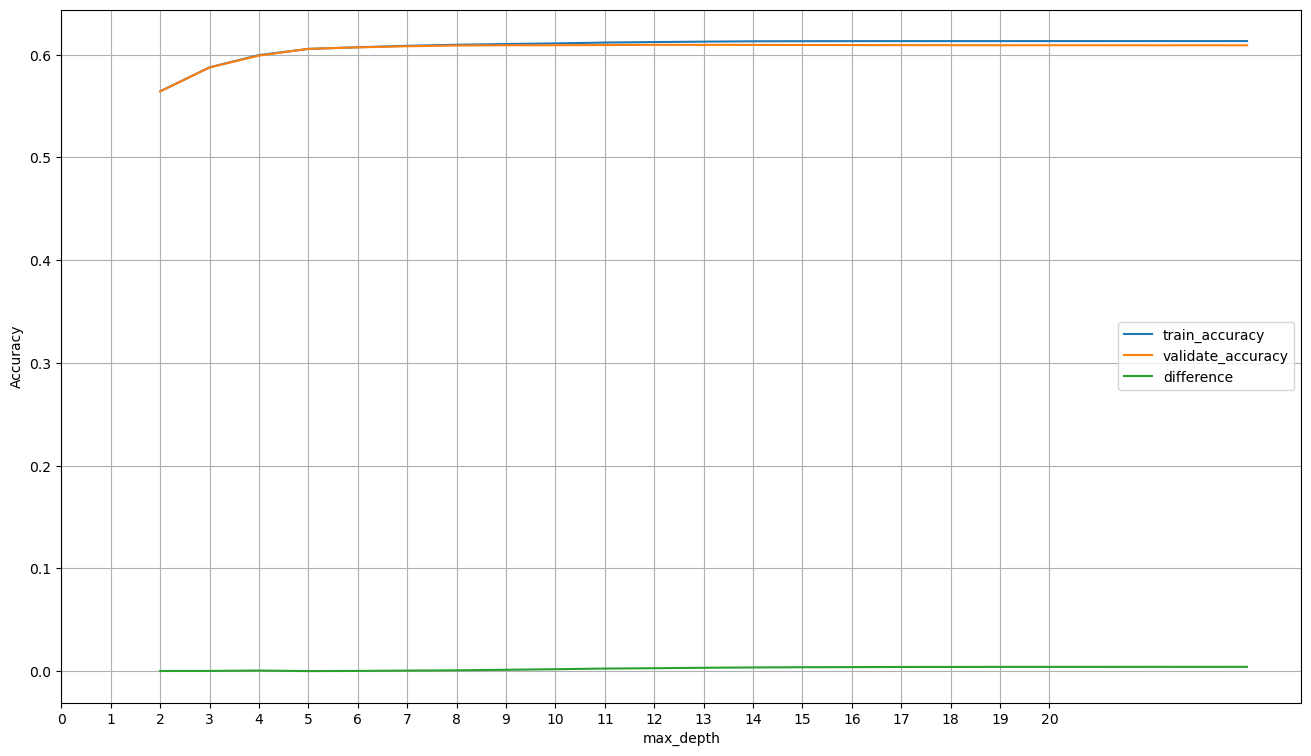

In [59]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


* We will go with a depth 7 random forest model including the aroma, barley, ABV, and lager variables as there is a large jump in score at this level and not much difference between train and validate sets overall. b

In [60]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit model on train
    forest = forest.fit(X_train, y_train)

    # Use the model
    # evaluate on train and then validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.565585,0.565408,0.000177
1,3,3,0.594516,0.594230,0.000285
2,4,4,0.599662,0.599096,0.000566
3,5,5,0.606029,0.605972,0.000056
4,6,6,0.607307,0.607192,0.000115
5,7,7,0.608609,0.608207,0.000402
6,8,8,0.609760,0.608635,0.001125
7,9,9,0.610282,0.608884,0.001398
8,10,10,0.610797,0.609240,0.001556
9,11,11,0.611400,0.609511,0.001888


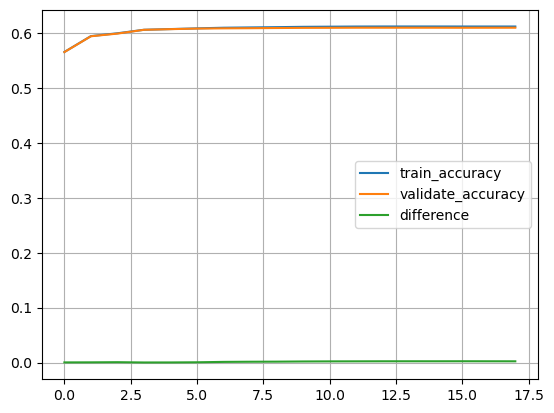

In [61]:
df[['train_accuracy', 'validate_accuracy','difference']].plot()
plt.grid()

In [62]:

metrics = []


for i in range(2, 50):
    # Make model
    depth = 5
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit model on train
    forest = forest.fit(X_train, y_train)

    # Use model
    # Evaluate on train and then validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,5,0.606029,0.605972,0.000056
1,3,5,0.606029,0.605972,0.000056
2,4,5,0.606029,0.605972,0.000056
3,5,5,0.606029,0.605972,0.000056
4,6,5,0.606029,0.605972,0.000056
5,7,5,0.606029,0.605972,0.000056
6,8,5,0.606029,0.605972,0.000056
7,9,5,0.606029,0.605972,0.000056
8,10,5,0.606029,0.605972,0.000056
9,11,5,0.606029,0.605972,0.000056


* Changing samples per leaf does not seem to affect accuracy much. We will only focus on depth. 

Let's test the final model

In [63]:
# make final model
forest = RandomForestClassifier(max_depth=9, random_state=7)

# fit final model
forest = forest.fit(X_train, y_train)

#calculate train accuracy of final model
in_sample_accuracy = forest.score(X_train, y_train)

#calculate on test
out_of_sample_accuracy = forest.score(X_validate, y_validate)

In [64]:
in_sample_accuracy

0.6104018202292514

In [66]:
out_of_sample_accuracy

0.6091900051367218

Final accuracy beats baseline by 4% and there's only a difference of roughly .01% between train and test accuracy